<a href="https://colab.research.google.com/github/dastone16/Waxing_Simulation/blob/main/Necker_Wax_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

station_count = 15
turret_count = 10
necker_size = station_count*turret_count
carry = 0.2
start_wax = 0
save_path = '/content/drive/MyDrive/Programming/Ardagh Data Analysis/Necker Waxing/'

#Brett Valech takes about 3-4 hrs of no wax to crash necker.  
# @ 1800 cpm * 60 min * 3 hrs / 12 pockets = 27,000 cans

#define necker stations
necker_DF = pd.DataFrame()
for i in range (0,necker_size):
  necker_DF.loc[i,0] = "Pocket " + str((i%station_count)+1)
  necker_DF.loc[i,1] = start_wax
necker_DF.rename(columns={0:"Location", 1:"Wax_Load"},inplace=True)

def data_description(data,label):
  description = data.describe().transpose()
  #print(description)
  description.to_csv(save_path + label + '.csv')

def wax_count (trips, skip):
  necker_DF.iloc[:,1] = start_wax
  for i in range(0,trips*station_count,skip+1):
    necker_DF.iloc[i%station_count,1] += 1
    for t in range(1,turret_count):
      necker_DF.iloc[((i%station_count)+(station_count*t)),1] += 1
  if turret_count==10:  
    f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(turret_count,1, figsize=(16,12),sharex=True)
    ax_list =[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10] # needed for iteration.
  if turret_count==4:
    f, (ax1,ax2,ax3,ax4) = plt.subplots(turret_count,1, figsize=(16,12),sharex=True)
    ax_list =[ax1,ax2,ax3,ax4] # need
  #f, axs = plt.subplots(ncols=1, nrows=10, figsize=(12,12),sharex=True)
  for i, each in enumerate(ax_list):
    sns.barplot(x=necker_DF.Location[i*station_count:(i*station_count)+station_count],y=necker_DF.Wax_Load[i*station_count:(i*station_count)+station_count],ax=each, color="b") #assumes station count of 12
  ax1.set_title("Skip_"+str(skip))
  for i, each in enumerate(ax_list):
    each.set_ylabel("Turret " + str(i+1))
    if i<10:
      each.set_xlabel("")
  
  f.savefig(save_path + 'Waxing.skip_'+str(skip)+'.jpg')
  data_description(necker_DF,"Skip"+str(skip))
  
  






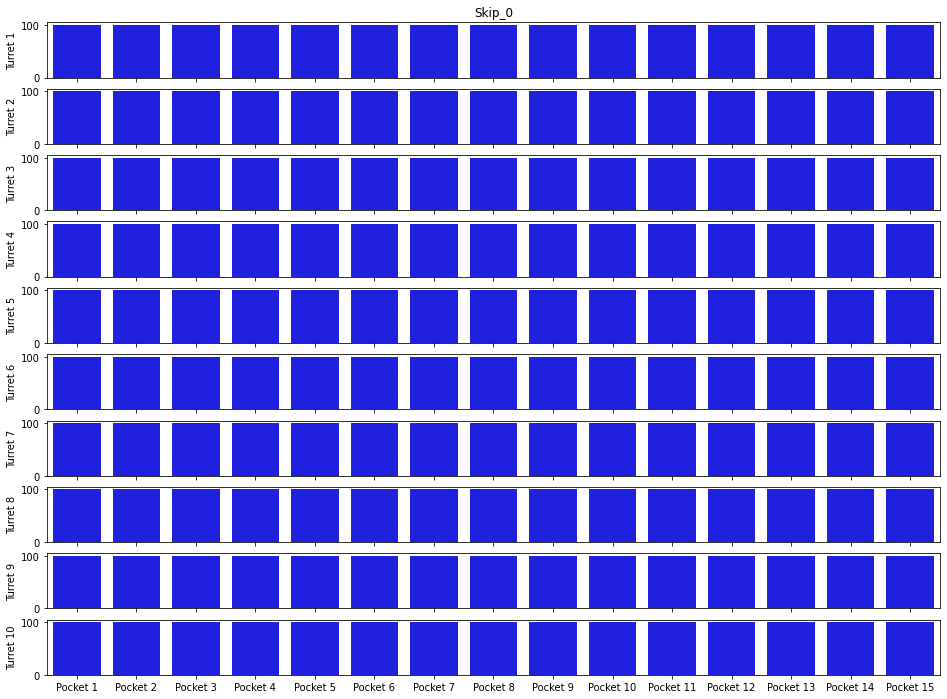

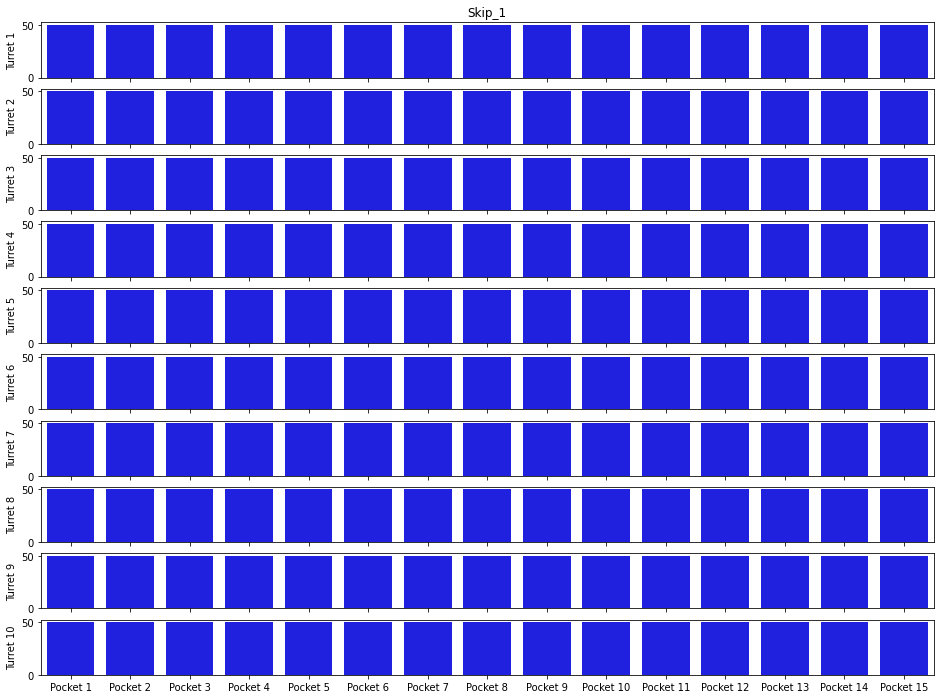

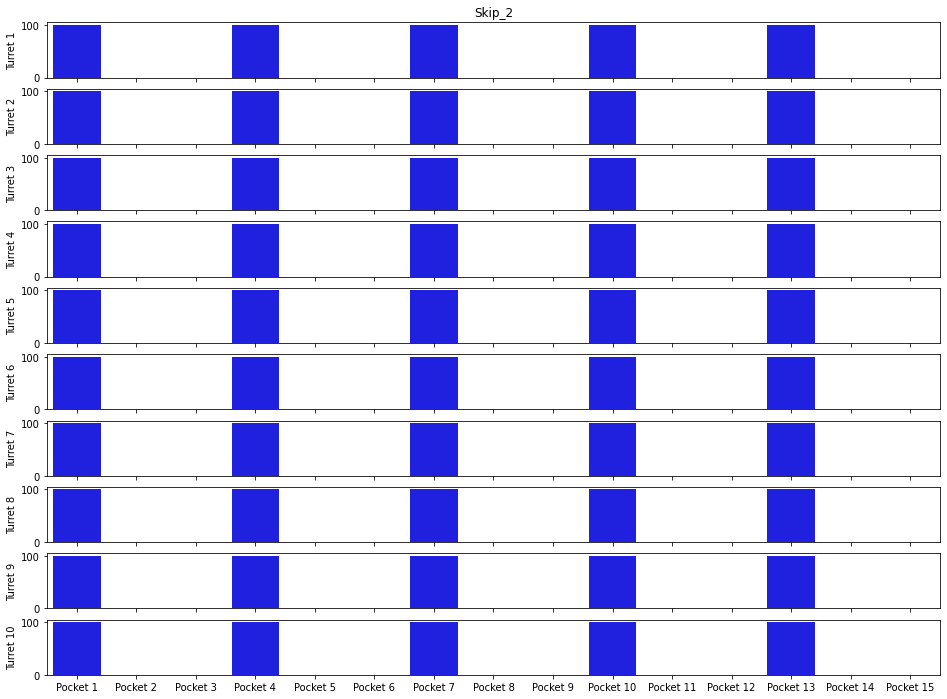

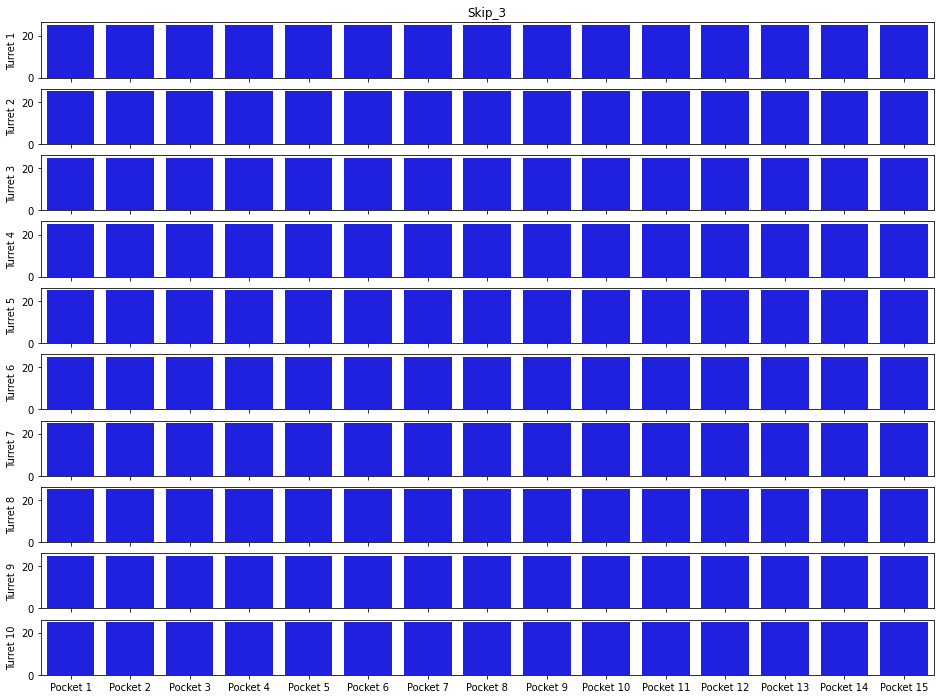

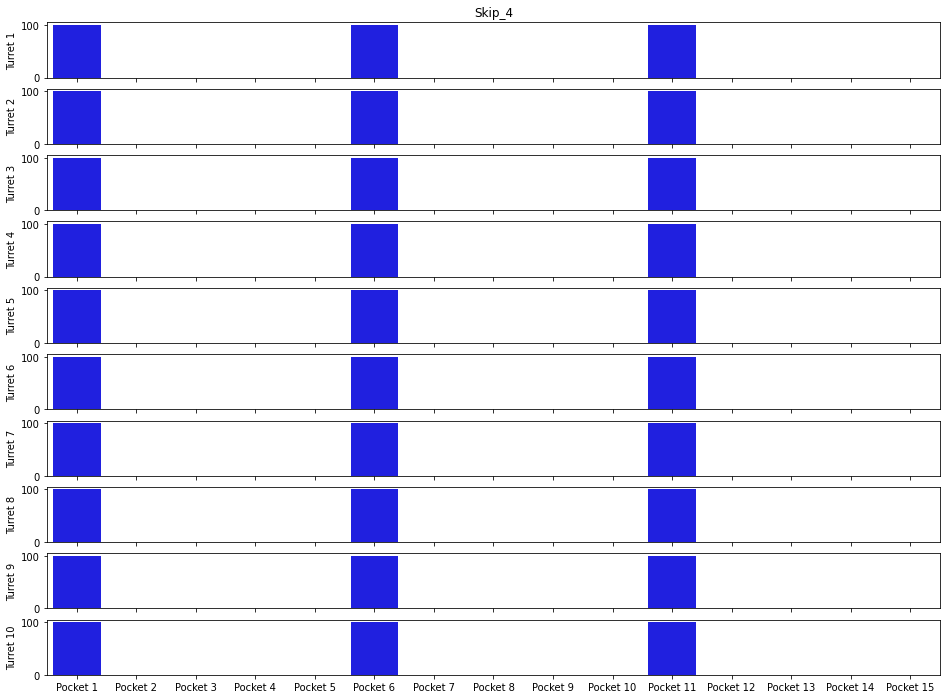

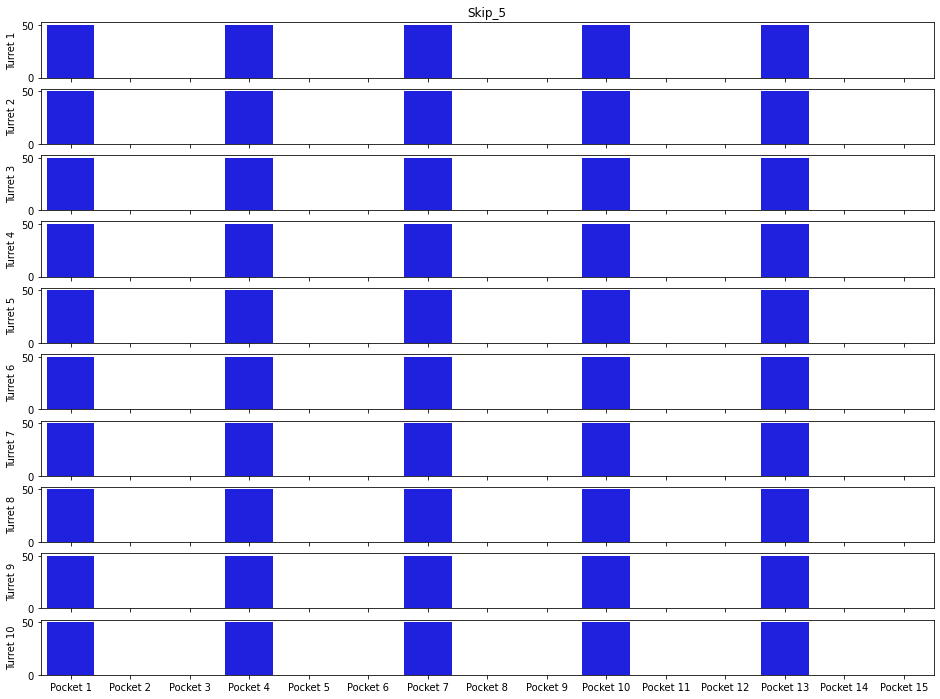

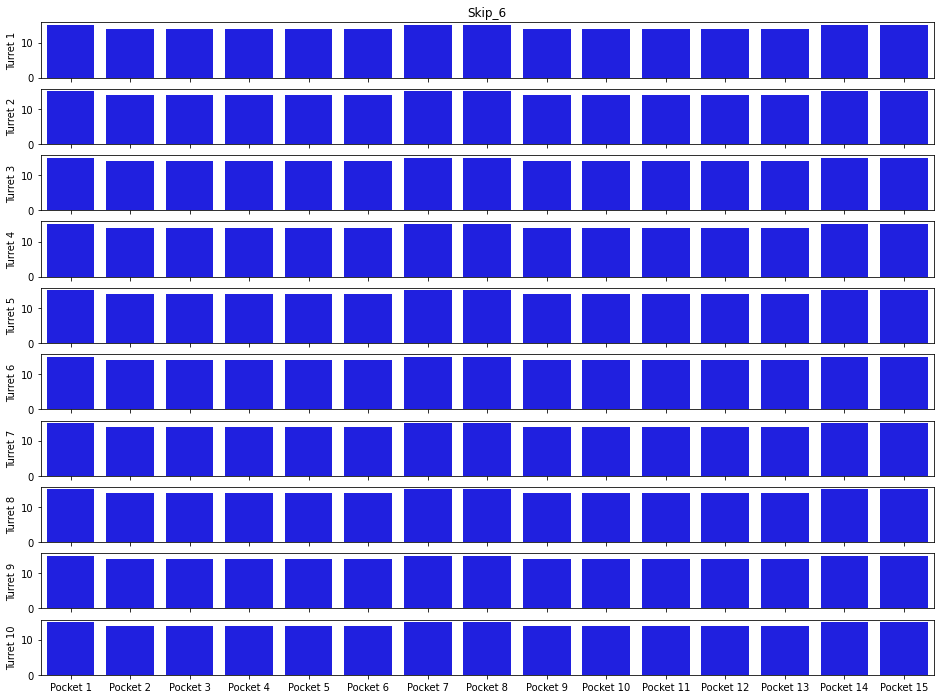

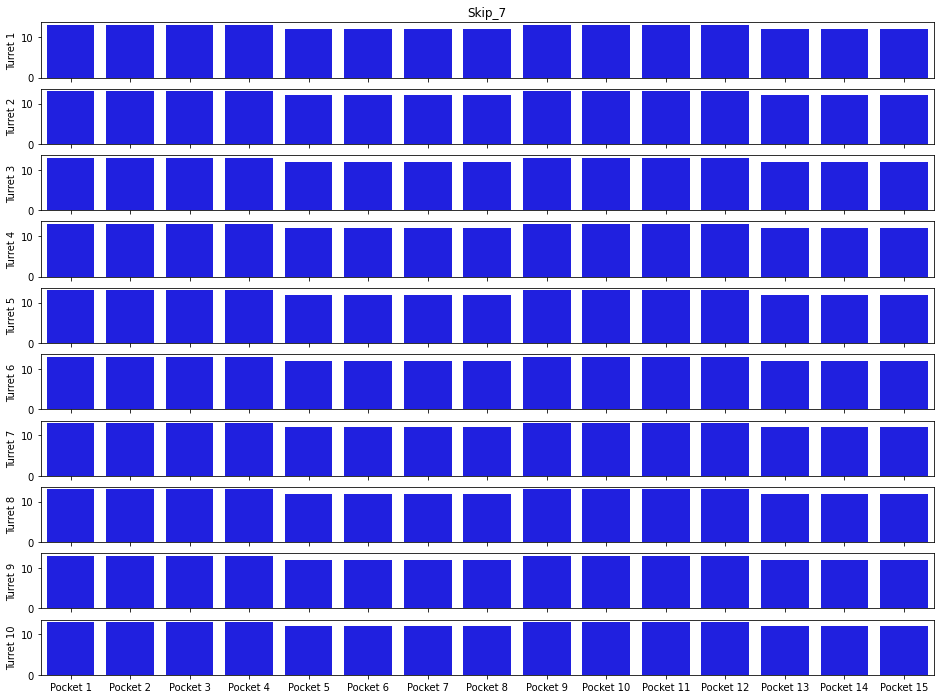

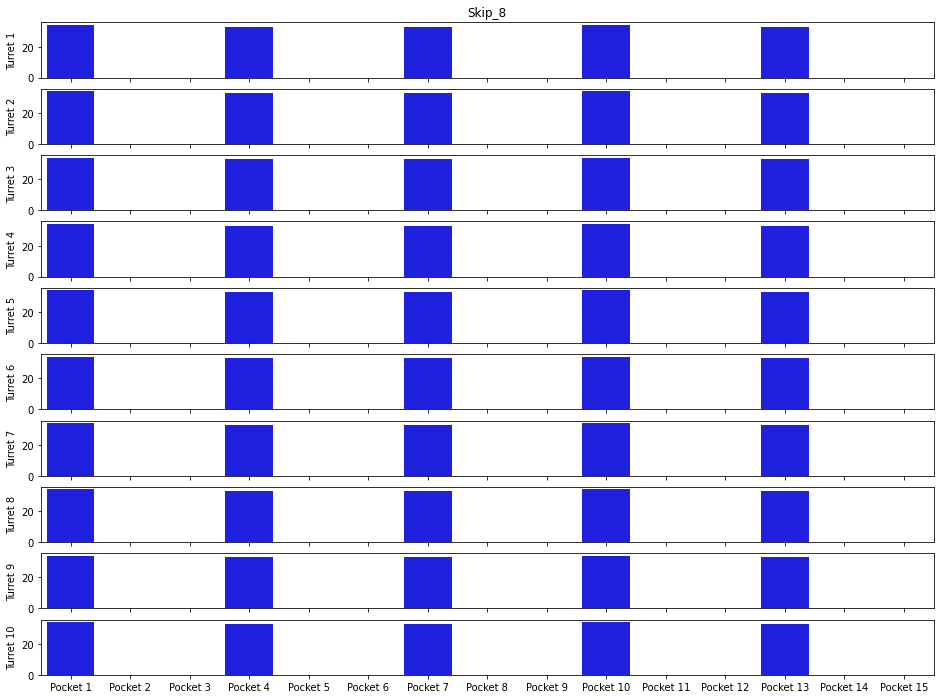

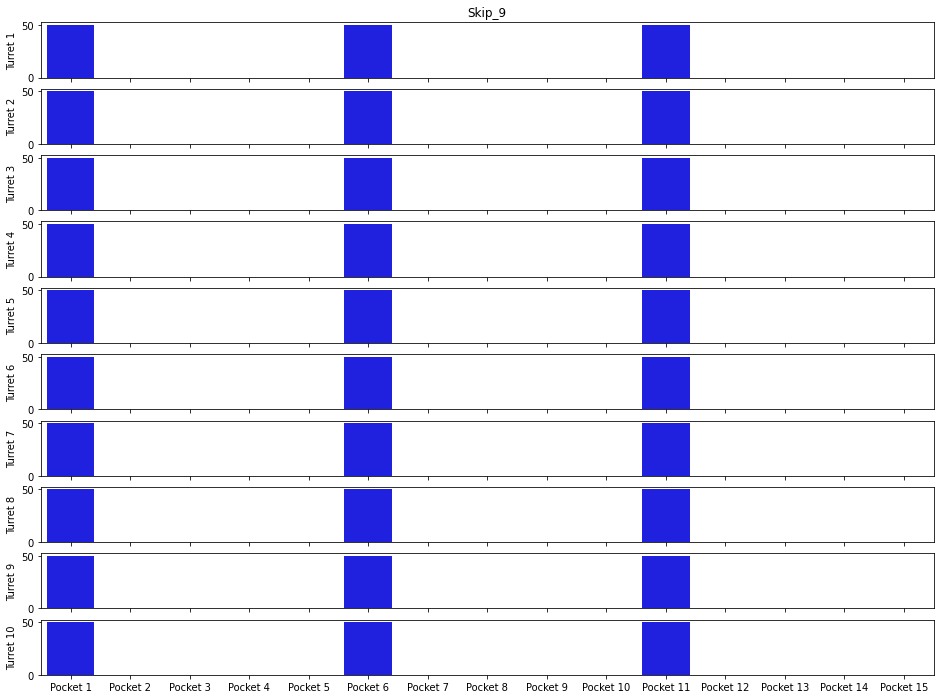

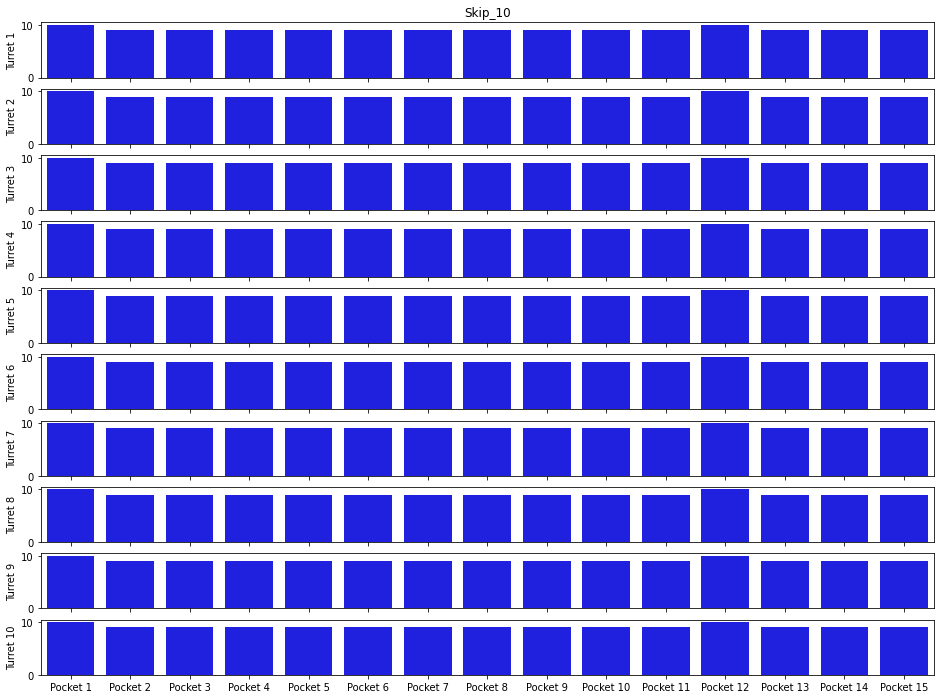

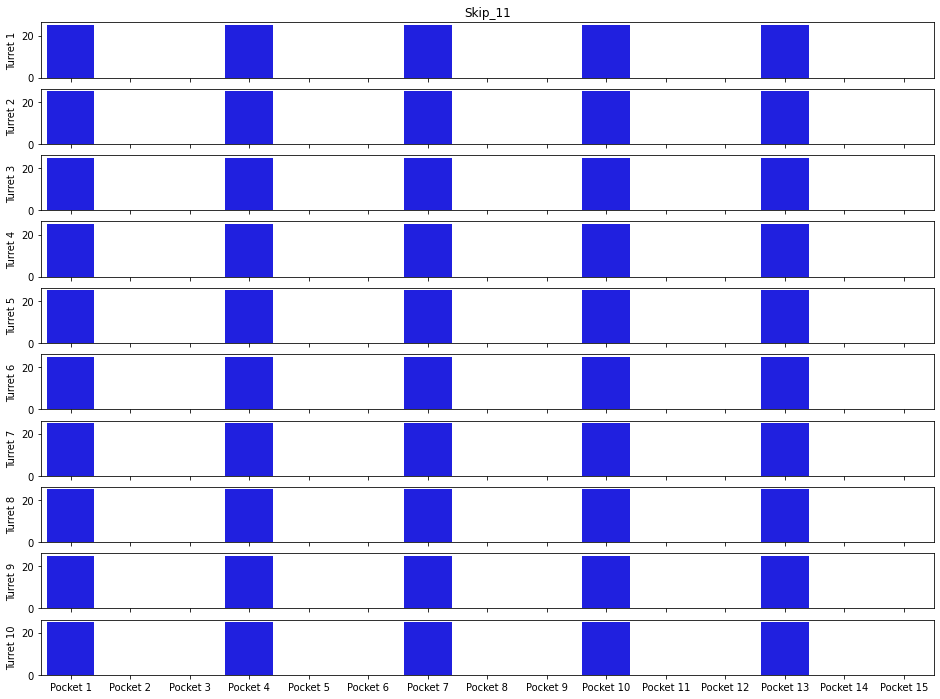

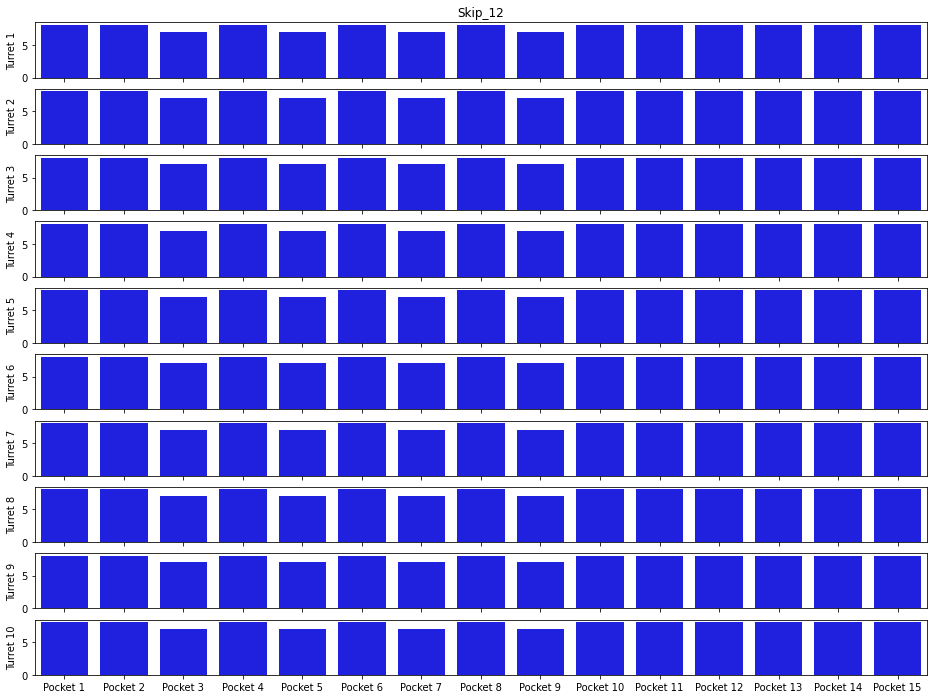

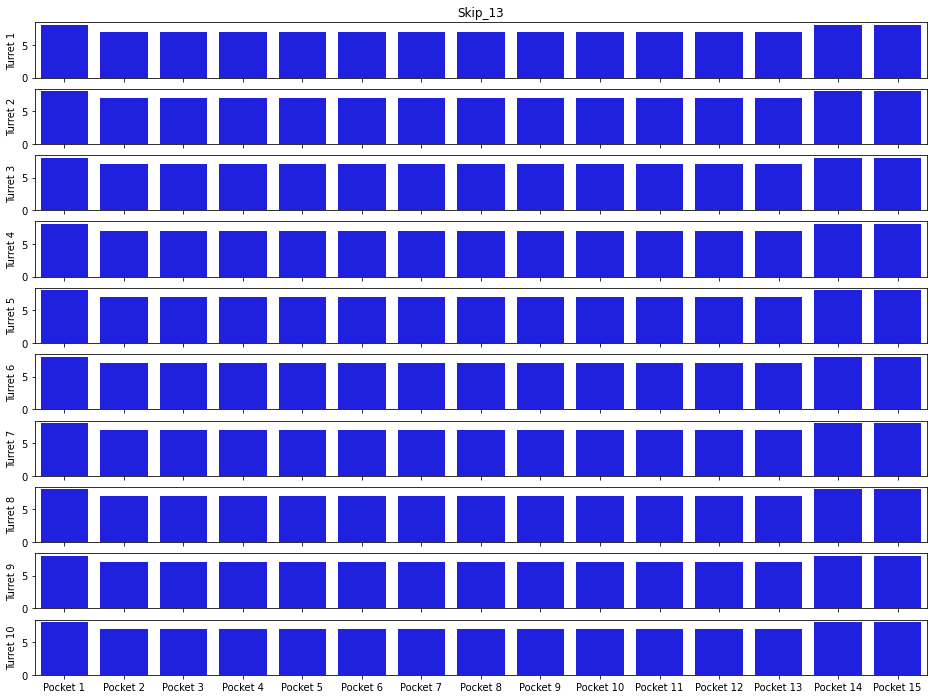

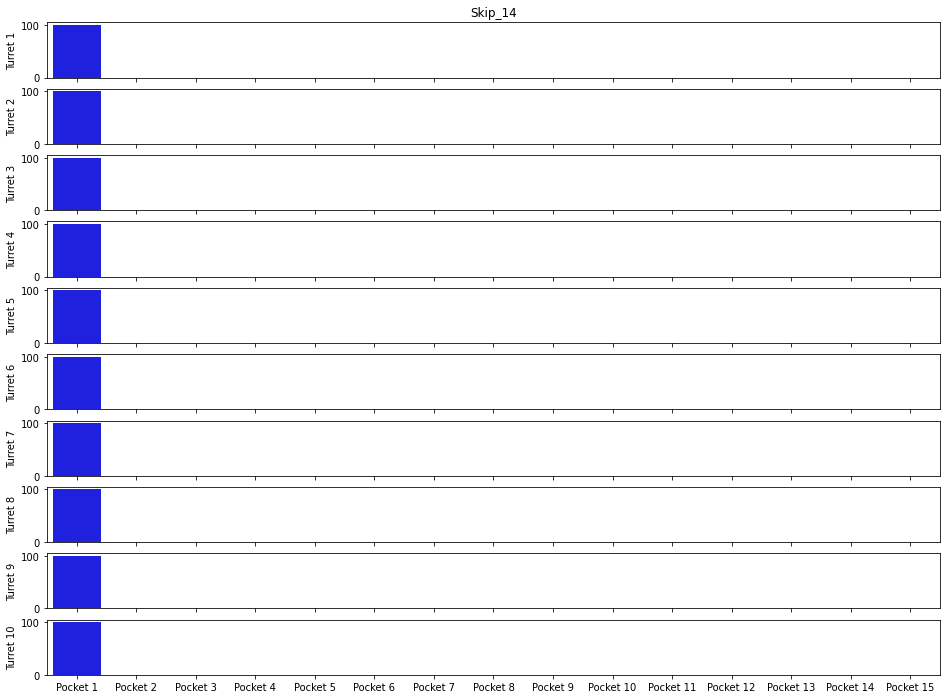

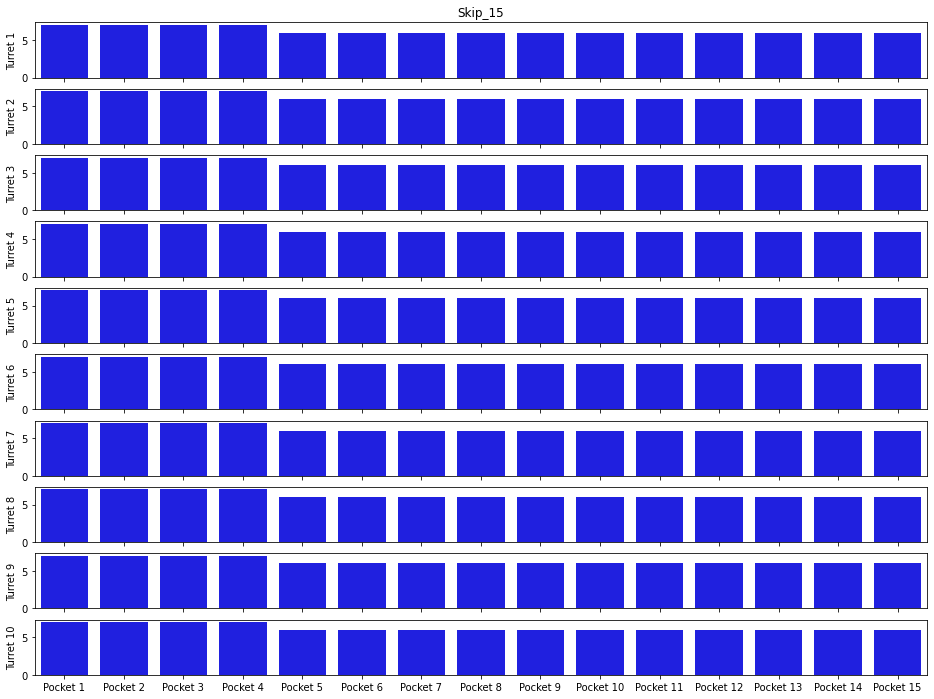

In [ ]:
for i in range(0,station_count+1):
  wax_count(100,i)

In [ ]:
for i in range(0,240,11):
  print(i%15)
  

0
11
7
3
14
10
6
2
13
9
5
1
12
8
4
0
11
7
3
14
10
6
